In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "avocado.csv"
avo_df = pd.read_csv(file)
avo_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#get rid of unnecessary data
avo_df = avo_df[['Date', 'AveragePrice', 'Total Volume']]
avo_df.head()

,Date,AveragePrice,Total Volume
0,2015-12-27,1.33,64236.62
1,2015-12-20,1.35,54876.98
2,2015-12-13,0.93,118220.22
3,2015-12-06,1.08,78992.15
4,2015-11-29,1.28,51039.60


In [7]:
#convert to correct date format
avo_df.Date = pd.to_datetime(avo_df.Date)

In [8]:
#find average price by month
data_month_avo = avo_df.resample('M', on='Date').mean()
data_month_avo.head()

,AveragePrice,Total Volume
Date,,
2015-01-31,1.365046,736308.355532
2015-02-28,1.326944,839438.887106
2015-03-31,1.361981,775153.832907
2015-04-30,1.383449,796630.544329
2015-05-31,1.344685,895896.379241


In [12]:
#reset index
avo_reset = data_month_avo.reset_index(drop=False, inplace=False)
avo_reset.head()

,Date,AveragePrice,Total Volume
0,2015-01-31,1.365046,736308.355532
1,2015-02-28,1.326944,839438.887106
2,2015-03-31,1.361981,775153.832907
3,2015-04-30,1.383449,796630.544329
4,2015-05-31,1.344685,895896.379241


In [22]:
#reformat date 
avo_reset['Date'] = avo_reset['Date'].dt.strftime('%m/%d/%Y')

In [23]:
#variables
xaxis = avo_reset['Date']
yaxis = avo_reset['AveragePrice']
vol = avo_reset['Total Volume']

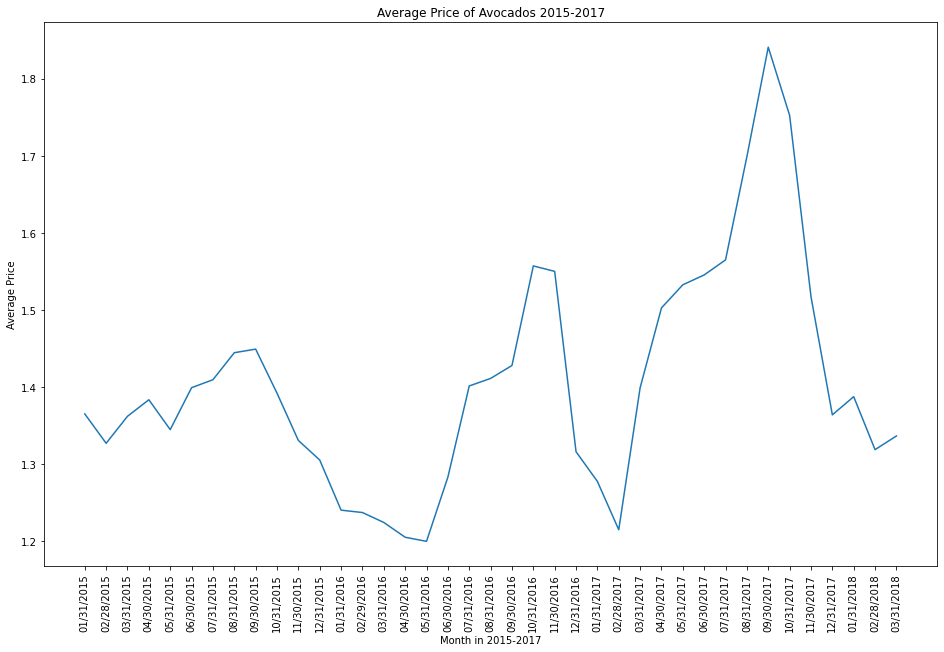

In [37]:
#plot
plt.plot(avo_reset['Date'], avo_reset['AveragePrice'])
plt.xlabel('Month in 2015-2017')
plt.ylabel('Average Price')
plt.title('Average Price of Avocados 2015-2017')

tick_locations = [value for value in xaxis]
plt.xticks(tick_locations, xaxis, rotation=90)

plt.rcParams['figure.figsize'] = [16,10]

#save image
plt.savefig("group_project_1/avo_time2.png")

plt.show()

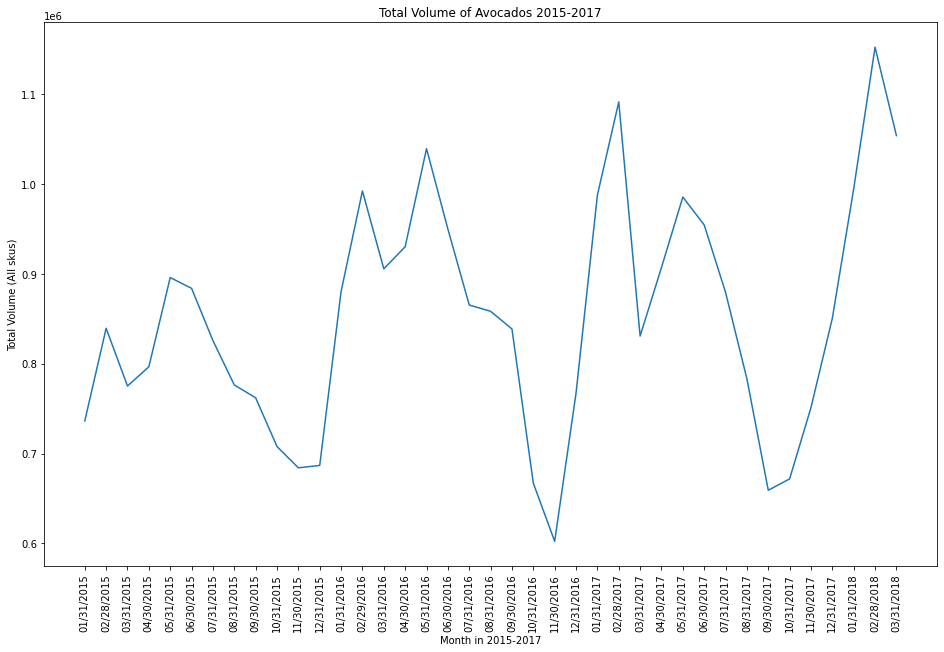

In [36]:
#plot volume over time
plt.plot(avo_reset['Date'], avo_reset['Total Volume'])
plt.xlabel('Month in 2015-2017')
plt.ylabel('Total Volume (All skus)')
plt.title('Total Volume of Avocados 2015-2017')

tick_locations = [value for value in xaxis]
plt.xticks(tick_locations, xaxis, rotation=90)

plt.rcParams['figure.figsize'] = [16,10]

#save image
plt.savefig("group_project_1/avo_vol.png")

plt.show()